In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
import statsmodels.stats.multicomp as sm
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
plt.style.use('ggplot')
df = pd.read_csv('https://stepik.org/media/attachments/lesson/396012/hw_aa.csv', sep =';')
df

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0
...,...,...,...,...,...
127013,127014,d1f082ede77b17a99a9b0b240daf7bdf,0,v2.8.0,0
127014,127015,94f0d540830ccdc6b29c1938eea445cc,0,v2.8.0,0
127015,127016,709f74cf9721328e98be6f216e8a05a8,1,v2.9.0,0
127016,127017,1767ae3f8ffec269d9ed0ac0ede68d90,1,v2.8.0,0


In [92]:
sg = df.groupby(['experimentVariant', 'version'],as_index= False).agg({'purchase' : 'sum', 'uid' : 'count'})
sg['conv'] = round(sg['purchase'] / sg['uid'] * 100, 2)
sg

,experimentVariant,version,purchase,uid,conv
0,0,v2.8.0,41,41283,0.10
1,0,v2.9.0,890,11921,7.47
2,0,v3.7.4.0,252,4204,5.99
3,0,v3.8.0.0,328,5694,5.76
4,1,v2.8.0,1895,41552,4.56
5,1,v2.9.0,858,12033,7.13
6,1,v3.7.4.0,266,4221,6.30
7,1,v3.8.0.0,384,6110,6.28


In [45]:
df.shape[0]
df.dtypes

Unnamed: 0            int64
uid                  object
experimentVariant     int64
version              object
purchase              int64
dtype: object

In [60]:
var = df.query("experimentVariant == 1")
var1 = df.query("experimentVariant == 0")
var1

,Unnamed: 0,uid,experimentVariant,version,purchase
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
6,7,8f14e45fceea167a5a36dedd4bea2543,0,v2.9.0,0
8,9,45c48cce2e2d7fbdea1afc51c7c6ad26,0,v2.8.0,0
11,12,c20ad4d76fe97759aa27a0c99bff6710,0,v2.8.0,0
16,17,70efdf2ec9b086079795c442636b55fb,0,v2.8.0,0
...,...,...,...,...,...
127008,127009,c64a339f44f3c22412c297cddc445291,0,v2.8.0,0
127011,127012,2309bc52f793ad50c3cbcab9e7cbc3f0,0,v2.8.0,0
127012,127013,2a6aecc2a058b72fb41dc7dbe4b25f75,0,v2.8.0,0
127013,127014,d1f082ede77b17a99a9b0b240daf7bdf,0,v2.8.0,0


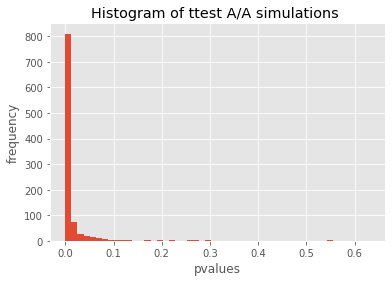

0.929

In [133]:
n = df.shape[0]
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = var.purchase.sample(n_s, replace = False).values
    s2 = var1.purchase.sample(n_s, replace = False).values
    res.append(st.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [65]:
ver = df.query("version == 'v2.8.0'" and "experimentVariant == 1" )
ver1 = df.query("version == 'v2.9.0'" and "experimentVariant == 1")

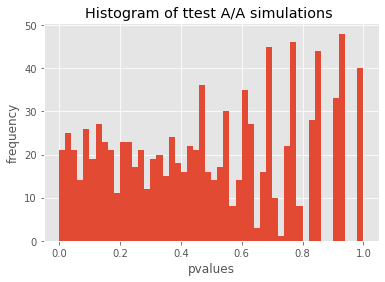

0.057

In [66]:
n = df.shape[0]
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = ver.purchase.sample(n_s, replace = False).values
    s2 = ver.purchase.sample(n_s, replace = False).values
    res.append(st.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [67]:
fas = df.query("version == 'v2.8.0'" and "experimentVariant == 0" )
fas1 = df.query("version == 'v2.9.0'" and "experimentVariant == 0")

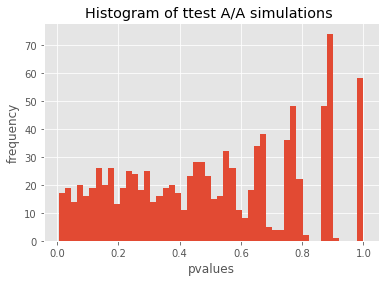

0.038

In [68]:
n = df.shape[0]
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = fas.purchase.sample(n_s, replace = False).values
    s2 = fas1.purchase.sample(n_s, replace = False).values
    res.append(st.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [70]:
nul = df.query("version == 'v2.8.0'" and "experimentVariant == 1" )
nul1 = df.query("version == 'v2.8.0'" and "experimentVariant == 0")

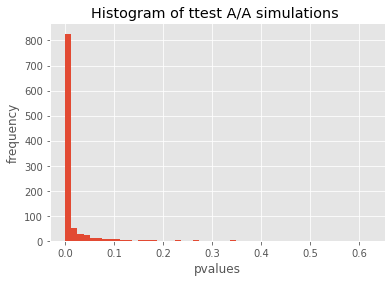

0.927

In [71]:
n = df.shape[0]
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = nul.purchase.sample(n_s, replace = False).values
    s2 = nul1.purchase.sample(n_s, replace = False).values
    res.append(st.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [74]:
mol = df.query("version == 'v2.9.0'" and "experimentVariant == 1" )
mol1 = df.query("version == 'v2.9.0'" and "experimentVariant == 0")

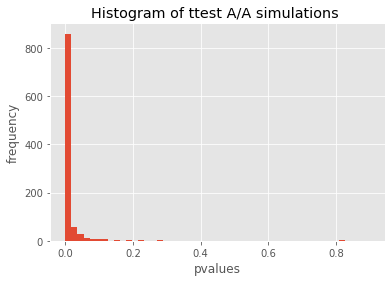

0.939

In [75]:
n = df.shape[0]
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = mol.purchase.sample(n_s, replace = False).values
    s2 = mol1.purchase.sample(n_s, replace = False).values
    res.append(st.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [129]:
sb = df.query("version != 'v2.8.0'").reset_index()
sb


,index,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
1,2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
2,6,7,8f14e45fceea167a5a36dedd4bea2543,0,v2.9.0,0
3,10,11,6512bd43d9caa6e02c990b0a82652dca,1,v2.9.0,0
4,13,14,aab3238922bcc25a6f606eb525ffdc56,1,v2.9.0,0
...,...,...,...,...,...,...
44178,126994,126995,3e3eeaa665b7d18d1146aa4e654d62b5,0,v2.9.0,0
44179,126996,126997,6f8ce2ea30ba2d0972dd0384f6635a44,0,v2.9.0,0
44180,127002,127003,970f71ac90be02ba17f2085ef0086391,0,v2.9.0,0
44181,127003,127004,0e671d3fc3d37c7e956765f06026171b,1,v2.9.0,0


In [130]:
sv = sb.groupby(['experimentVariant', 'version'],as_index= False).agg({'purchase' : 'sum', 'uid' : 'count'})
sv['conv'] = round(sv['purchase'] / sv['uid'] * 100, 2)
sv

,experimentVariant,version,purchase,uid,conv
0,0,v2.9.0,890,11921,7.47
1,0,v3.7.4.0,252,4204,5.99
2,0,v3.8.0.0,328,5694,5.76
3,1,v2.9.0,858,12033,7.13
4,1,v3.7.4.0,266,4221,6.30
5,1,v3.8.0.0,384,6110,6.28


In [131]:
vas = sb.query("experimentVariant == 1")
vas1 = sb.query("experimentVariant == 0")


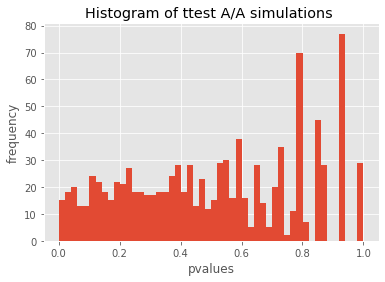

0.043

In [132]:
n = df.shape[0]
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = vas.purchase.sample(n_s, replace = False).values
    s2 = vas1.purchase.sample(n_s, replace = False).values
    res.append(st.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [ ]:
Проведя A-A тест по всем данным, мы получили значение, которое > значения a.
Из этого делаем вывод что где-то имеется ошибка. После этого сгруппуруем данные
по версси и тесту и вычисляем процент конверсии